In [1]:
import torch
from torch import nn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from torchinfo import summary

In [2]:
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42
EPOCHS = 100
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
X_blob, y_blob = make_blobs(n_samples=1000, 
                            n_features=NUM_FEATURES, 
                            centers=NUM_CLASSES, 
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

In [4]:
print(X_blob.shape, y_blob.shape)
X_blob

(1000, 2) (1000,)


array([[-8.41339595,  6.93516545],
       [-5.76648413, -6.43117072],
       [-6.04213682, -6.76610151],
       ...,
       [ 3.2157805 ,  5.92174278],
       [-7.79389549, -7.16056655],
       [-9.6815798 ,  7.0096901 ]])

In [5]:
# Convert to torch tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.long)

In [6]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([800, 2]) torch.Size([800])
torch.Size([200, 2]) torch.Size([200])


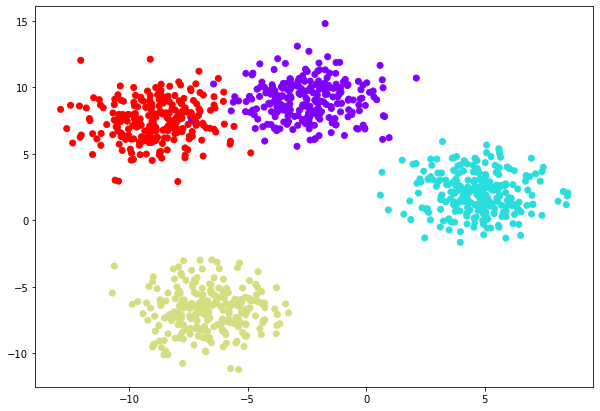

In [7]:
# Visualize the data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap='rainbow');

Training

In [8]:
from networks import SimpleNet, DeepNet, DeepNetV2
from trainer import fit, fit_, predict, evaluate
from utils import plot_decision_boundary

CRITERION = nn.CrossEntropyLoss()

In [9]:
simple_net = SimpleNet(NUM_FEATURES, NUM_CLASSES).to(DEVICE)
summary(simple_net, input_size=X_train.unsqueeze(0).shape)

Layer (type:depth-idx)                   Output Shape              Param #
SimpleNet                                [1, 800, 4]               --
├─Linear: 1-1                            [1, 800, 256]             768
├─Linear: 1-2                            [1, 800, 128]             32,896
├─Linear: 1-3                            [1, 800, 64]              8,256
├─Linear: 1-4                            [1, 800, 4]               260
Total params: 42,180
Trainable params: 42,180
Non-trainable params: 0
Total mult-adds (M): 0.04
Input size (MB): 0.01
Forward/backward pass size (MB): 2.89
Params size (MB): 0.17
Estimated Total Size (MB): 3.07

In [ ]:
# Training loop

torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

OPTIMIZER = torch.optim.SGD(simple_net.parameters(), lr=0.01)
simple_history = fit_(EPOCHS, simple_net, CRITERION, OPTIMIZER, X_train, y_train, X_test, y_test, DEVICE)

In [ ]:
# Plot the decision boundary
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(simple_net, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(simple_net, X_test, y_test)

In [ ]:
# DeepNet
deep_net = DeepNet(NUM_FEATURES, NUM_CLASSES).to(DEVICE)
OPTIMIZER = torch.optim.SGD(deep_net.parameters(), lr=0.01)

deepnet_history = fit_(EPOCHS, deep_net, CRITERION, OPTIMIZER, X_train, y_train, X_test, y_test, DEVICE)

In [ ]:
deep_net2 = DeepNetV2(NUM_FEATURES, NUM_CLASSES).to(DEVICE)
OPTIMIZER = torch.optim.SGD(deep_net2.parameters(), lr=0.01)

deepnet2_history = fit_(EPOCHS, deep_net2, CRITERION, OPTIMIZER, X_train, y_train, X_test, y_test, DEVICE)

In [ ]:
# Plot the decision boundary
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(deep_net2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(deep_net2, X_test, y_test)